<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/AtomVisionExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example to run [AtomVision](https://github.com/usnistgov/atomvision)

AtomVision is a deep learning package to perform various operations on image data including segmentation and classification of images. 

**For faster computing, change notebook hardware to "GPU". Edit > Notebook Settings > Hardware Accelerator > GPU**

# Table of Contents
1. Install [AtomVision](https://github.com/usnistgov/atomvision) package
2. Generating STEM image with convolution approximation: graphene example
3. Train an autoencoder
4. Train a Generative Adversarial Network
5. Train DenseNet classification model on JARVIS-DFT 2D STEM image dataset
6. Generate Graph over Atomistic Image
7. Train ALIGNN based classification model on JARVIS-DFT 2D STEM image dataset


# Get the repository and install

In [1]:
!pip install --pre dgl -f https://data.dgl.ai/wheels/cu117/repo.html
!pip install --pre dglgo -f https://data.dgl.ai/wheels-test/repo.html
!pip install atomvision


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.dgl.ai/wheels/cu117/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 MB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 7.0 MB/s eta 0:00:00
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.dgl.ai/wheels-test/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 KB 559.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 KB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 109.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 555.3/555.3 KB 64.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... 

In [2]:
pip install Pillow==9.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 90.2 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
atomvision 2023.1.27 requires Pillow>=9.2.0, but you have pillow 9.0.0 which is incompatible.


In [3]:
import os
!pwd
os.chdir('/content')
# Clone ALIGNN repo to get example folder
if not os.path.exists('atomvision'):
  !git clone https://github.com/usnistgov/atomvision.git
os.chdir('atomvision')

/content
Cloning into 'atomvision'...
remote: Enumerating objects: 1977, done.
remote: Counting objects: 100% (1973/1973), done.
remote: Compressing objects: 100% (1622/1622), done.
remote: Total 1977 (delta 349), reused 1926 (delta 333), pack-reused 4
Receiving objects: 100% (1977/1977), 161.65 MiB | 10.75 MiB/s, done.
Resolving deltas: 100% (349/349), done.


Generating STEM image with convolution approximation: graphene example

In [4]:
!python atomvision/scripts/stem_conv.py --file_path atomvision/tests/POSCAR --output_path Graphene_STEM.png

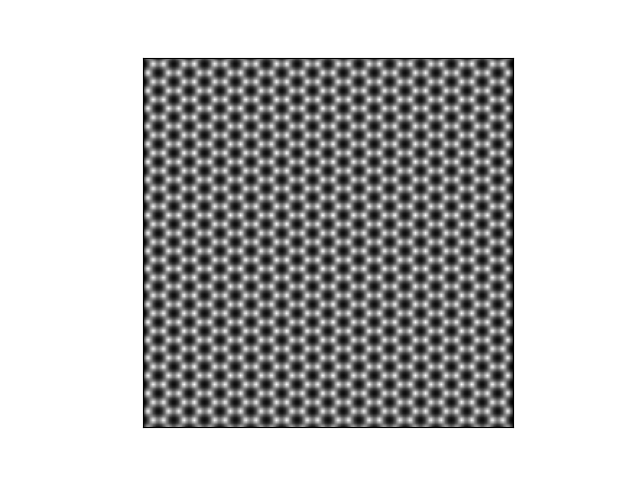

In [5]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
Image('Graphene_STEM.png')

Autoencoder

In [6]:
!python atomvision/scripts/train_autoencoder.py --train_folder atomvision/sample_data/test_folder --test_folder atomvision/sample_data/test_folder --epochs 10

Using feature size 1120
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Epoch, train_loss, val_loss 1 4.659492885073026 0.05856316412488619
Epoch, train_loss, val_loss 2 0.053290779805845685 0.04808584517902798
Epoch, train_loss, val_loss 3 0.046815445439683065 0.045594283690055214
Epoch, train_loss, val_loss 4 0.0446779475443893 0.043494042423036366
Epoch, train_loss, val_loss 5 0.04354447374741236 0.04273433569404814
Epoch, train_loss, val_loss 6 0.04218653920623991 0.04184515857034259
Epoch, train_loss, val_loss 7 0.04092265499962701 0.04094284648696581
Epoch, trai

Generative Adversarial Network

In [7]:
!python atomvision/scripts/train_gan.py --dataset_path atomvision/sample_data/test_folder/0 --epochs 2

6 2
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100% 548M/548M [00:02<00:00, 284MB/s]
Training Epoch 0 : 100% 6/6 [00:12<00:00,  2.14s/it, disc_loss=0.353, gen_loss=0.931]
Testing Epoch 0 : 100% 2/2 [00:01<00:00,  1.09it/s, disc_loss=0.482, gen_loss=0.914]
Training Epoch 1 : 100% 6/6 [00:12<00:00,  2.13s/it, disc_loss=0.068, gen_loss=0.812]
Testing Epoch 1 : 100% 2/2 [00:01<00:00,  1.26it/s, disc_loss=0.245, gen_loss=0.869]


# Example Plots for Each Image Class

The convolutional neural network classifies the structures into the 5 categories of STM images. Here, we print out example images from each category to look at their shared characteristics. Each image is labelled here with its composition and space group.

In [8]:
import os

#List the class sub-folders generated by the neural network
test_folder = "atomvision/sample_data/test_folder/"

os.listdir(test_folder)

['3', '1', '2', '0', '4']

In [9]:
#Load the JARVIS-DFT 2D Dataset to maatch JARVIS-ID to spacegroup
from jarvis.core.atoms import Atoms
from jarvis.db.figshare import data
dft_2d = data("dft_2d")

Obtaining 2D dataset 1.1k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815705


100%|██████████| 8.39M/8.39M [00:01<00:00, 4.49MiB/s]


Loading the zipfile...
Loading completed.


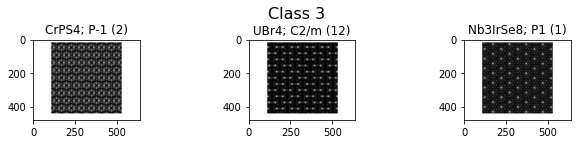

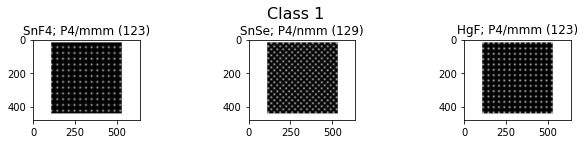

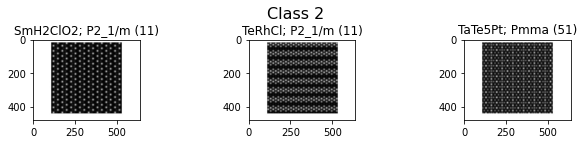

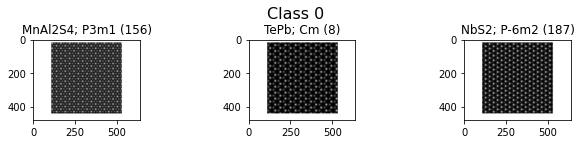

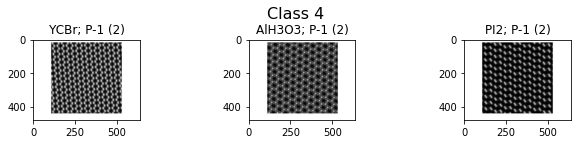

In [10]:
%matplotlib inline
for cls in os.listdir(test_folder):
  fig, ax = plt.subplots(1,3, figsize = (9,2))
  fig.tight_layout(w_pad = 2)
  fig.subplots_adjust(top=0.75)
  fig.suptitle('Class {}'.format(cls), fontsize=16)
  i = 1
  for img in os.listdir(test_folder + cls)[:3]:
    plt.subplot(1,3,i)
    plt.imshow(plt.imread(test_folder + cls + "/" + img))
    start = img.find('JVASP')
    end = img.find('.jpg')
    jid = img[start:end]
    entry = next(j for j in dft_2d if j["jid"] == jid)
    atoms = Atoms.from_dict(entry["atoms"])
    comp = atoms.composition.reduced_formula
    spg = atoms.spacegroup()
    plt.title("{}; {}".format(comp, spg)) #Label by composition and space group.
    i = i+1
plt.show()

# Train DenseNet pretrained model on JARVIS-DFT 2D materials' STEM images generated with convolution approximation

Datasets can be generated with STM/STEM sections of the data folder with generate_data.py script or pre-populated image datasets can be downloaded with 'download.py`. We create two folders ``train_folder``, ``test_folder`` with sub-folders ``0,1,2,3,4,...`` for individual classes and they contain images for these classes such that the train-test splits have a proportionate number of images. An example for using pre-trained densenet on STEM JARVIS-DFT 2D dataset is given below. Change ``train_folder`` and ``test_folder`` paths in order to use a different dataset.


The classification model chosen here is the DenseNet (reference [paper](https://paperswithcode.com/method/dense-block)), which include "dense blocks", modules in which all the layers of the neural network are directly connected to one another. 

**Try Modifying** 
1. Other classification models (such as [ResNet](https://paperswithcode.com/method/resnet) or [VGG](https://paperswithcode.com/method/vgg)) can be trialled as well by substitute (using ``model_name`` tag)
2. Number of training epochs (using ``epochs`` tag)
3. Batch size (using ``batch_size`` tag)
4. Loss function (using ``criterion`` tag)

This example shows how to classify 2D-lattice (5 Bravais classes) for 2D-materials STM/STEM images.

We will use imagessample_data folder. It was generated with generate_stem.py script. There are two folders train_folder, test_folder with sub-folders 0,1,2,3,4,... for individual classes and they contain images for these classes.
This is a smaller version of the entire dataset, which is available at: https://doi.org/10.6084/m9.figshare.16788268

In [11]:
!python atomvision/scripts/train_classifier_cnn.py --model densenet --train_folder atomvision/sample_data/test_folder --test_folder atomvision/sample_data/test_folder --epochs 5 --batch_size 16

DGL backend not selected or invalid.  Assuming PyTorch for now.
Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=DenseNet161_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet161_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/dens

In [12]:
#Show any output files that have been generated
!ls

Acc.png			    cm.json	       images	     setup.py
ae.pt			    CM.png	       LICENSE.md    test.png
atomvision		    CODEMETA.yaml      Loss.png
atomvision_checkpoint_4.pt  Graphene_STEM.png  README.md
atomvision_checkpoint_5.pt  history.json       saved_models


## Show Performance Metrics Using Test Set

Metrics used to train the classifier include the _accuracy_, _loss_, and _confusion matrix_. Each of which is discussed and plotted out below.

**Accuracy versus Training Epochs**

The classification accuracy is calculated from the relative number of true positive (TP), true negative (TN), false positive (FP), and false negative (FN). It equals the number of correct predictions divided by the total number of predictions.

$\mathrm{Accuracy} = \frac{(TP + TN)}{(TP + FN + FP + TN)}$

([], [])

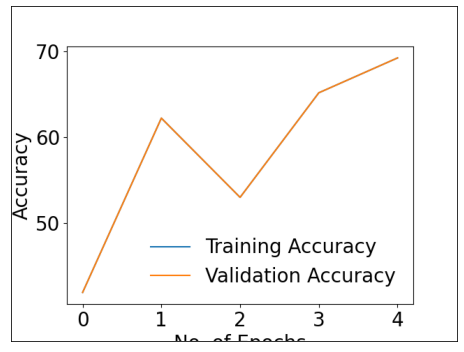

In [13]:
import matplotlib.image as mpimg
plt.figure(figsize = (8,8))
img = mpimg.imread('Acc.png')
imgplot = plt.imshow(img)
plt.xticks([])
plt.yticks([])

**Loss versus Training Epochs**

The default loss function is the negative log likelihood, which should be minimzed in order to have the highest probabilities associated with correctly labelled samples.

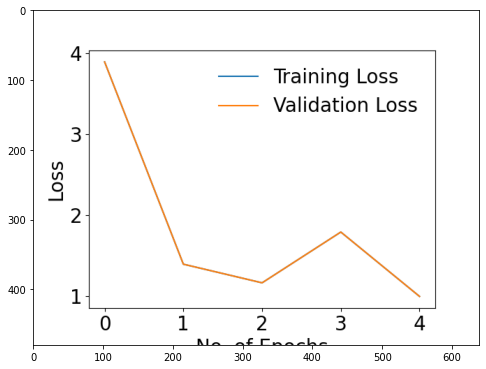

In [14]:
plt.figure(figsize = (8,8))
img = mpimg.imread('Loss.png')
imgplot = plt.imshow(img)

**Confusion Matrix**

The confusion matrix provides a visual representation of the performance of the classification model. The ``true`` labels are shown along the vertical axis, while the ``predicted`` labels are given along the horizontal axis. Any sample that lies along the diagonal is correctly classified, while off-diagonal samples are incorrectly classified. 

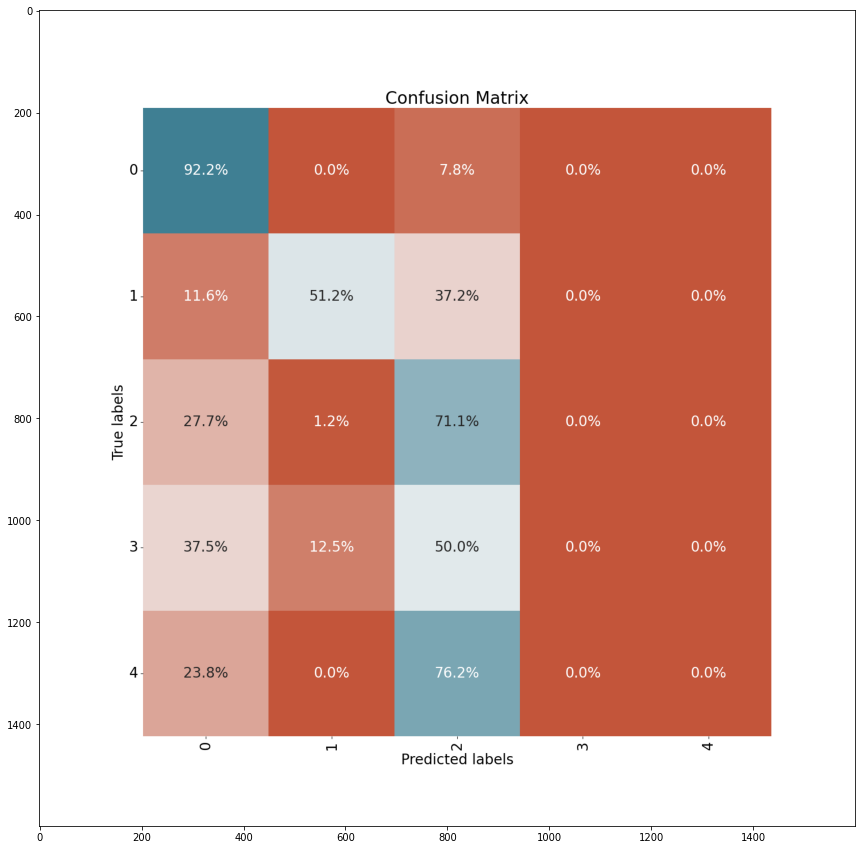

In [15]:
plt.figure(figsize = (15,15))
img = mpimg.imread('CM.png')
imgplot = plt.imshow(img)

# Graph Generation over Atomistic Image

In order to apply a graph neural network to image analysis tasks, we first demonstrate how to produce a graph representation of the atomistic image. In this example, a blob detection algorithm is first used to localize atoms. The blobs become the nodes of the graph, where the node features coorespond to blob attributes like the radius, maximum intensity, and mean intensity values within the blob. Next, the Digitital Graph Library (``dgl``) package is used to construct a graph by connecting neighboring nodes with edges up to a cut-off radius that can be modified by the user. The edges represent bond vectors between the atoms. An additional line graph is also generated, where the nodes represent bond vector and the edges represent triplets of atoms, or bond vectors. 

Below, we show an exaple graph construction with the atomistic graph overlaid on an example simulated STEM image.

In [16]:
# !pip install --pre dgl -f https://data.dgl.ai/wheels/cu117/repo.html
# !pip install --pre dglgo -f https://data.dgl.ai/wheels-test/repo.html
# !pip install alignn

(480, 640)


/usr/local/lib/python3.8/dist-packages/dgl/backend/pytorch/tensor.py:52: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:204.)
  return th.as_tensor(data, dtype=dtype)


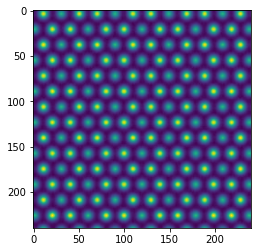

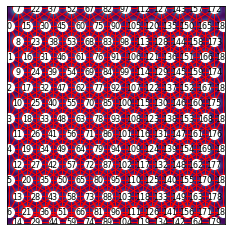

In [17]:
from atomvision.scripts.image_to_graph import *

img = cv2.imread(test_folder + "0/JVASP-13509.jpg", cv2.IMREAD_GRAYSCALE)
print(img.shape)

#Cropping image before graph generation
crp_img = crop_image(img, [120,120,200,200])

# Get blob (atom) locations and attributes
blobs_list = get_blob_positions(crp_img, plot=True)

# Generate atomistic graph and line graph
g, lg = blob_list_to_graph(crp_img, blobs_list, plot=True)

In [18]:
from atomvision.scripts.train_classifier_alignn import main
from jarvis.db.figshare import data
import pandas as pd
from jarvis.core.atoms import Atoms
from jarvis.core.lattice import get_2d_lattice

dft_2d = pd.DataFrame(data("dft_2d"))
c2_db = pd.DataFrame(data("c2db"))
twod_matp = pd.DataFrame(data("twod_matpd"))
c2_db["spg_formula"] = c2_db["atoms"].apply(
    lambda x: (Atoms.from_dict(x)).composition.reduced_formula
    + "_"
    + str((Atoms.from_dict(x)).get_spacegroup[0])
)
twod_matp["spg_formula"] = twod_matp["atoms"].apply(
    lambda x: (Atoms.from_dict(x)).composition.reduced_formula
    + "_"
    + str((Atoms.from_dict(x)).get_spacegroup[0])
)
twod_matp["id"] = twod_matp["material_id"]
dft_2d["spg_formula"] = dft_2d["atoms"].apply(
    lambda x: (Atoms.from_dict(x)).composition.reduced_formula
    + "_"
    + str((Atoms.from_dict(x)).get_spacegroup[0])
)
dft_2d["id"] = dft_2d["jid"]
df1 = (
    pd.concat([dft_2d, c2_db, twod_matp])
    .drop_duplicates("spg_formula")
    .reset_index(drop=True)
)
print(len(dft_2d) + len(c2_db) + len(twod_matp))
df1["lat"] = df1["atoms"].apply(lambda x: get_2d_lattice(x)[1])

info = []
for i,ii in df1.iterrows():
   mem={}
   mem['jid'] =ii['id']
   mem['atoms']=ii['atoms']
   info.append(mem)
info=info[0:400]
print (len(info))


training.output_feats 1
training.output_feats 1
Obtaining 2D dataset 1.1k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815705
Loading the zipfile...
Loading completed.
Obtaining C2DB dataset 3.5k...
Reference:https://iopscience.iop.org/article/10.1088/2053-1583/aacfc1


100%|██████████| 5.52M/5.52M [00:01<00:00, 3.33MiB/s]


Loading the zipfile...
Loading completed.
Obtaining 2DMatPedia dataset 6k...
Reference:https://www.nature.com/articles/s41597-019-0097-3


100%|██████████| 1.56M/1.56M [00:01<00:00, 1.25MiB/s]


Loading the zipfile...
Loading completed.
10974
400


In [19]:
from jarvis.db.jsonutils import dumpjson
c = {
    "training": {
        "batch_size": 32,
        "epochs": 3,
        "learning_rate": 0.001,
        "learning_rate_finetune": 3e-05
    }
}
dumpjson(data=c,filename="config_alignn.json")


In [20]:
main(info=info,config_file='config_alignn.json',test_size=0.25)

100%|██████████| 400/400 [01:13<00:00,  5.45it/s]


Classification dataset. tensor([0, 1, 2, 2, 1, 3, 4, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 4, 1, 1, 2, 0,
        0, 2, 0, 2, 2, 0, 0, 2, 1, 4, 4, 0, 2, 0, 2, 1, 0, 4, 0, 2, 0, 2, 1, 2,
        1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 2, 4, 3, 0, 2,
        2, 0, 1, 1, 2, 1, 1, 0, 0, 2, 0, 4, 4, 3, 2, 0, 4, 1, 3, 3, 1, 0, 0, 0,
        0, 0, 1, 1])
Classification dataset. tensor([0, 2, 0, 2, 0, 0, 2, 1, 1, 2, 4, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1,
        2, 0, 1, 0, 2, 4, 2, 1, 2, 4, 1, 3, 0, 0, 0, 2, 0, 2, 3, 0, 0, 0, 3, 2,
        0, 0, 0, 0, 0, 3, 2, 3, 1, 0, 2, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 4, 2, 1,
        4, 4, 0, 1, 0, 1, 2, 0, 1, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 0, 4, 0,
        2, 2, 2, 4, 0, 2, 0, 3, 1, 4, 4, 0, 4, 0, 2, 1, 2, 1, 3, 0, 4, 2, 4, 0,
        4, 4, 0, 0, 0, 0, 0, 3, 2, 4, 4, 1, 0, 2, 0, 2, 2, 1, 1, 2, 1, 1, 0, 4,
        0, 4, 1, 0, 2, 1, 3, 1, 4, 0, 4, 2, 0, 1, 2, 2, 2, 2, 1, 1, 1, 2, 0, 0,
        2, 2, 0, 0, 1, 3, 2, 0, 1, 0, 1, 1, 0, 0, 2

2023-03-06 23:13:55,296 trainer INFO: Engine run starting with max_epochs=3.


Epoch[1.1] Loss: 2.82
Epoch[1.2] Loss: 2.49
Epoch[1.3] Loss: 2.42
Epoch[1.4] Loss: 1.61
Epoch[1.5] Loss: 1.47
Epoch[1.6] Loss: 1.45
Epoch[1.7] Loss: 1.31
Epoch[1.8] Loss: 1.46


2023-03-06 23:14:03,308 trainer INFO: Engine run starting with max_epochs=1.


Epoch[1.9] Loss: 1.89


2023-03-06 23:14:05,490 trainer INFO: Epoch[1] Complete. Time taken: 00:00:02.180
2023-03-06 23:14:05,492 trainer INFO: Engine run complete. Time taken: 00:00:02.182
2023-03-06 23:14:05,496 trainer INFO: Engine run starting with max_epochs=1.


train - Epoch:1 Avg acc:0.40 Avg nlll:1.54


2023-03-06 23:14:06,183 trainer INFO: Epoch[1] Complete. Time taken: 00:00:00.682
2023-03-06 23:14:06,187 trainer INFO: Engine run complete. Time taken: 00:00:00.686
2023-03-06 23:14:06,188 trainer INFO: Epoch[1] Complete. Time taken: 00:00:10.889


validation - Epoch:1 Avg acc:0.42 Avg nlll:1.49
Epoch[2.10] Loss: 1.57
Epoch[2.11] Loss: 1.05
Epoch[2.12] Loss: 0.86
Epoch[2.13] Loss: 1.45
Epoch[2.14] Loss: 0.92
Epoch[2.15] Loss: 0.74
Epoch[2.16] Loss: 0.96
Epoch[2.17] Loss: 1.24
Epoch[2.18] Loss: 0.99


2023-03-06 23:14:12,015 trainer INFO: Engine run starting with max_epochs=1.
2023-03-06 23:14:14,235 trainer INFO: Epoch[1] Complete. Time taken: 00:00:02.215
2023-03-06 23:14:14,241 trainer INFO: Engine run complete. Time taken: 00:00:02.221
2023-03-06 23:14:14,243 trainer INFO: Engine run starting with max_epochs=1.


train - Epoch:2 Avg acc:0.40 Avg nlll:1.80


2023-03-06 23:14:14,960 trainer INFO: Epoch[1] Complete. Time taken: 00:00:00.715
2023-03-06 23:14:14,962 trainer INFO: Engine run complete. Time taken: 00:00:00.717
2023-03-06 23:14:14,967 trainer INFO: Epoch[2] Complete. Time taken: 00:00:08.775


validation - Epoch:2 Avg acc:0.40 Avg nlll:1.81
Epoch[3.19] Loss: 0.65
Epoch[3.20] Loss: 0.67
Epoch[3.21] Loss: 0.95
Epoch[3.22] Loss: 0.88
Epoch[3.23] Loss: 0.81
Epoch[3.24] Loss: 1.03
Epoch[3.25] Loss: 0.82
Epoch[3.26] Loss: 1.10


2023-03-06 23:14:21,034 trainer INFO: Engine run starting with max_epochs=1.


Epoch[3.27] Loss: 0.67


2023-03-06 23:14:23,366 trainer INFO: Epoch[1] Complete. Time taken: 00:00:02.330
2023-03-06 23:14:23,368 trainer INFO: Engine run complete. Time taken: 00:00:02.332
2023-03-06 23:14:23,373 trainer INFO: Engine run starting with max_epochs=1.


train - Epoch:3 Avg acc:0.39 Avg nlll:1.62


2023-03-06 23:14:24,091 trainer INFO: Epoch[1] Complete. Time taken: 00:00:00.716
2023-03-06 23:14:24,093 trainer INFO: Engine run complete. Time taken: 00:00:00.718
2023-03-06 23:14:24,096 trainer INFO: Epoch[3] Complete. Time taken: 00:00:09.127
2023-03-06 23:14:24,099 trainer INFO: Engine run complete. Time taken: 00:00:28.801
2023-03-06 23:14:24,107 trainer INFO: Engine run starting with max_epochs=1.


validation - Epoch:3 Avg acc:0.39 Avg nlll:1.60


2023-03-06 23:14:24,824 trainer INFO: Epoch[1] Complete. Time taken: 00:00:00.716
2023-03-06 23:14:24,826 trainer INFO: Engine run complete. Time taken: 00:00:00.718


history
{'train': {'accuracy': [0.3958333333333333,
                        0.4027777777777778,
                        0.3923611111111111],
           'cm': [tensor([[114,   0,   0,   0,   0],
        [ 51,   0,   0,   0,   0],
        [ 78,   0,   0,   0,   0],
        [ 15,   0,   0,   0,   0],
        [ 30,   0,   0,   0,   0]]),
                  tensor([[116,   0,   0,   0,   0],
        [ 49,   0,   0,   0,   0],
        [ 78,   0,   0,   0,   0],
        [ 13,   0,   0,   0,   0],
        [ 32,   0,   0,   0,   0]]),
                  tensor([[113,   0,   0,   0,   0],
        [ 51,   0,   0,   0,   0],
        [ 78,   0,   0,   0,   0],
        [ 14,   0,   0,   0,   0],
        [ 32,   0,   0,   0,   0]])],
           'nll': [1.5353349049886067, 1.7958236270480685, 1.6213887532552083],
           'precision': [tensor([0.3958, 0.0000, 0.0000, 0.0000, 0.0000], dtype=torch.float64),
                         tensor([0.4028, 0.0000, 0.0000, 0.0000, 0.0000], dtype=torch.float64),
 

TypeError: ignored